In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataframe=pd.read_csv('loan.csv')

C:\Users\91955\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dataframe.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
dataframe[dataframe.loan_status.isin(['Default'])].head()

,id,loan_amnt,int_rate,grade,home_ownership,annual_inc,issue_d,loan_status,purpose,open_acc,last_pymnt_d,open_il_12m,open_il_24m


In [7]:
dataframe_null_count=dataframe.isnull().sum()

In [11]:
dataframe_null_count.head(10)

id                 2260668
member_id          2260668
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
dtype: int64

In [53]:
use_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'loan_status', 'open_il_12m','id', 'purpose', 'loan_status', 'home_ownership' , 'grade', 'purpose', 'issue_d', 'last_pymnt_d','open_il_24m']
dataframe=pd.read_csv('loan.csv',usecols=use_cols)

In [54]:
dataframe.head()

,id,loan_amnt,int_rate,grade,home_ownership,annual_inc,issue_d,loan_status,purpose,open_acc,last_pymnt_d,open_il_12m,open_il_24m
0,NaN,2500,13.56,C,RENT,55000.0,Dec-2018,Current,debt_consolidation,9.0,Feb-2019,1.0,2.0
1,NaN,30000,18.94,D,MORTGAGE,90000.0,Dec-2018,Current,debt_consolidation,13.0,Feb-2019,2.0,3.0
2,NaN,5000,17.97,D,MORTGAGE,59280.0,Dec-2018,Current,debt_consolidation,8.0,Feb-2019,0.0,2.0
3,NaN,4000,18.94,D,MORTGAGE,92000.0,Dec-2018,Current,debt_consolidation,10.0,Feb-2019,3.0,5.0
4,NaN,30000,16.14,C,MORTGAGE,57250.0,Dec-2018,Current,debt_consolidation,12.0,Feb-2019,3.0,5.0


<h2>Numerical Variables<h2>

In [14]:
import seaborn as sns

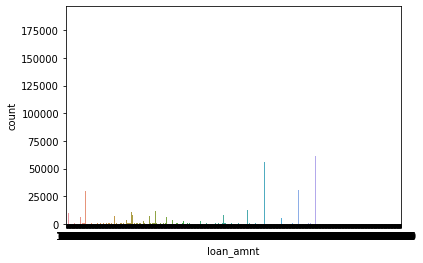

In [55]:
# Distrubution of loan amount requested

sns.countplot('loan_amnt',data=dataframe)

Text(0.5, 1.0, 'Loan amount Distrubution')

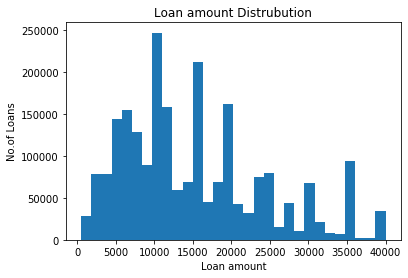

In [56]:
plt.hist('loan_amnt',data=dataframe,bins=30)
plt.xlabel('Loan amount')
plt.ylabel('No.of Loans')
plt.title('Loan amount Distrubution')

We can observe that more number of people are requested for 5000,10000,150000,20000,35000

Text(0.5, 1.0, 'Intrest rate distrubution')

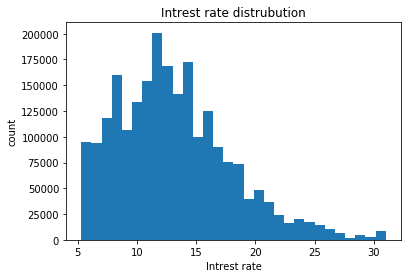

In [57]:
plt.hist('int_rate',data=dataframe,bins=30)
plt.xlabel('Intrest rate')
plt.ylabel('count')
plt.title('Intrest rate distrubution')

we can observe most of the loans with intrest rate ranging b/w 7.5% to 17.5%

In [67]:
dataframe['annual_inc'].unique()

[ 55000.   90000.   59280.  ...  12494.4  75856.  103510. ]


(0, 40)

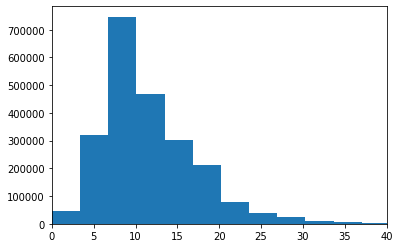

In [68]:
plt.hist('open_acc',data=dataframe,bins=30)
plt.xlim(0,40)

In [69]:
dataframe['open_il_12m'].isnull().sum()

866129

Text(0, 0.5, 'No of persons')

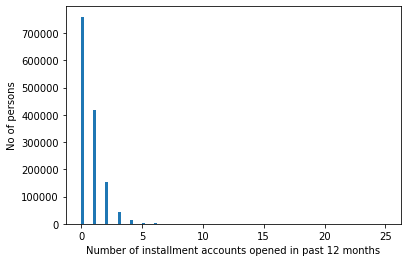

In [70]:
plt.hist('open_il_12m',data=dataframe,bins=100)
plt.xlabel('Number of installment accounts opened in past 12 months')
plt.ylabel('No of persons')

We can see that many of barrowers dont have any installment account opened in past 12 months, some have 1 or 2 accounts

In [71]:
# Lets inspect the data of loan status

dataframe['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

<h2>Categorical Values<h2>

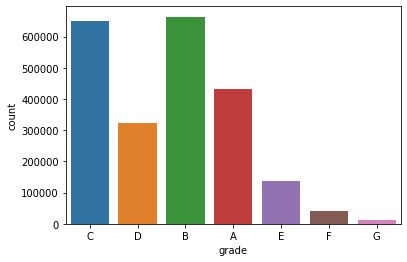

In [72]:
sns.countplot('grade',data=dataframe)

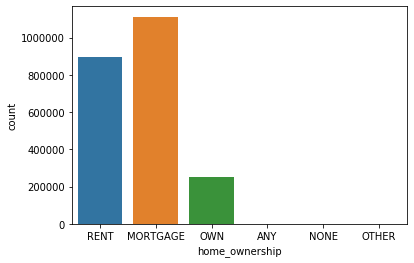

In [73]:
sns.countplot('home_ownership',data=dataframe)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

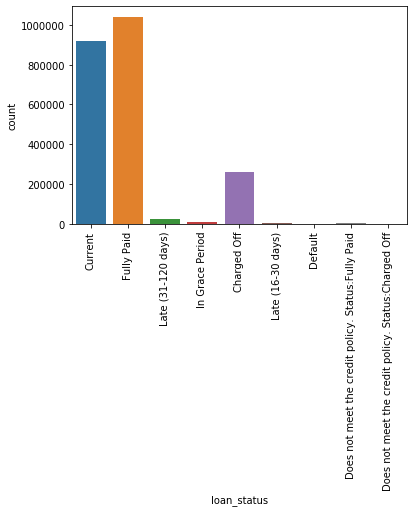

In [74]:
sns.countplot('loan_status',data=dataframe)
plt.xticks(rotation='vertical')

Most of the loans are paid back.

In [75]:
# Replacing Default values with 1 and others with 0 in new column dafaulted


dataframe['dafaulted']=np.where(dataframe.loan_status.isin(['Default']),1,0)

In [77]:
dataframe[dataframe.loan_status.isin(['Default'])].head()

,id,loan_amnt,int_rate,grade,home_ownership,annual_inc,issue_d,loan_status,purpose,open_acc,last_pymnt_d,open_il_12m,open_il_24m,dafaulted
220496,NaN,7500,12.73,B,MORTGAGE,50000.0,Jul-2018,Default,medical,4.0,Oct-2018,1.0,1.0,1
220980,NaN,30000,20.89,D,MORTGAGE,109000.0,Jul-2018,Default,debt_consolidation,12.0,Feb-2019,1.0,1.0,1
260870,NaN,1000,17.47,D,MORTGAGE,56160.0,Jun-2018,Default,other,4.0,NaN,0.0,0.0,1
338482,NaN,35000,10.90,B,OWN,30000.0,May-2018,Default,debt_consolidation,3.0,Feb-2019,0.0,0.0,1
347594,NaN,22000,24.84,E,RENT,62000.0,Apr-2018,Default,other,16.0,Feb-2019,2.0,2.0,1


In [78]:
len(dataframe[dataframe.loan_status.isin(['Default'])])

31